In [29]:
import pandas as pd
import os
import numpy as np
from numpy import column_stack
from pandas import read_csv
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score
from scipy.stats import mode
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from matplotlib import cm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from joblib import dump
from joblib import load

In [30]:
print('Leyendo el archivo csv')
df = pd.read_csv("D:\\jupyter\\csv\\UNSW_NB15_training-set.csv")
#dataframe11 = pd.read_csv("D:\\jupyter\\csv\\UNSW_NB15_testing-set.csv")
print('Concatenar los archivos')
#df = pd.concat([dataframe1, dataframe11])

Leyendo el archivo csv
Concatenar los archivos


In [31]:
df = df.drop(['id'], axis = 1)
# df = df.drop(['attack_cat'], axis = 1)

In [32]:
df['proto'] = df['proto'].astype('category')
df['service'] = df['service'].astype('category')
df['state'] = df['state'].astype('category')

In [33]:
cat_columns = df.select_dtypes(['category']).columns
cat_columns

Index(['proto', 'service', 'state'], dtype='object')

In [34]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [35]:
print('Label distribution Training set:')
print(df['label'].value_counts())
print()

Label distribution Training set:
1    119341
0     56000
Name: label, dtype: int64



In [23]:
df.loc[df.label == 1] = "Ataque"

In [24]:
df.label.value_counts()

Ataque    119341
0          56000
Name: label, dtype: int64

In [25]:
labell = pd.value_counts(df['label'], sort = True)
labell

Ataque    119341
0          56000
Name: label, dtype: int64

(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

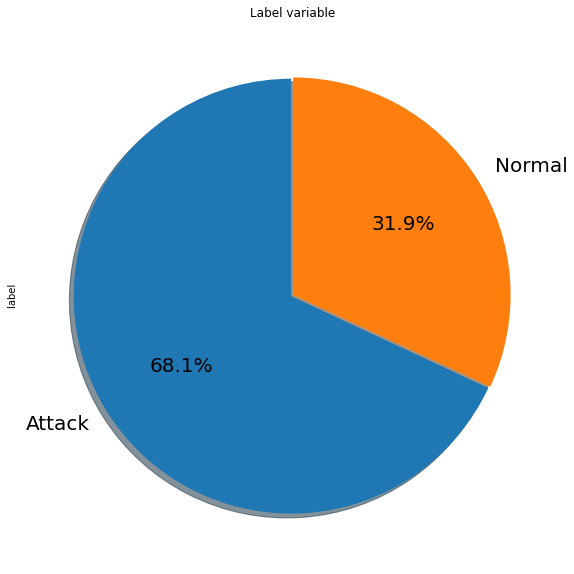

In [26]:
plt.figure(figsize=(10,10))
label = ['Normal','Attack']

labell.plot(kind = 'pie', explode = (0.01,0.001), labels = ['Attack','Normal'], autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 20}) # color = ('blue','red','purple','black','lightblue','magenta','lightblue')) #
plt.title("Label variable")
plt.xticks(rotation=0)

In [36]:
ataques = df.drop(df[df['attack_cat'] == 'Normal'].index)

In [37]:
tipos = pd.value_counts(ataques['attack_cat'], sort = True)
tipos

Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

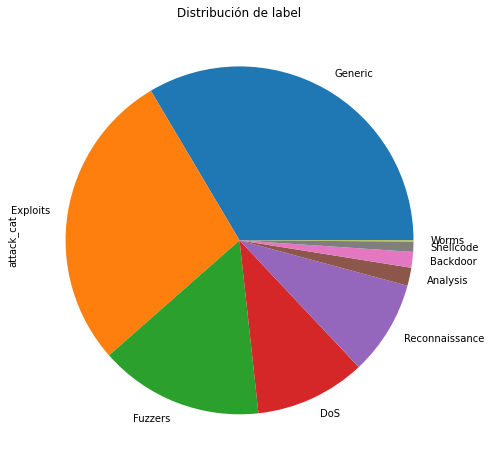

In [38]:
plt.figure(figsize=(16,8))
label = ['Generic','Exploits','Fuzzers','DoS','Reconnaissance','Analysis', 'Backdoor','Shellcode','Worms']

tipos.plot(kind = 'pie')
plt.title("Distribución de label")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

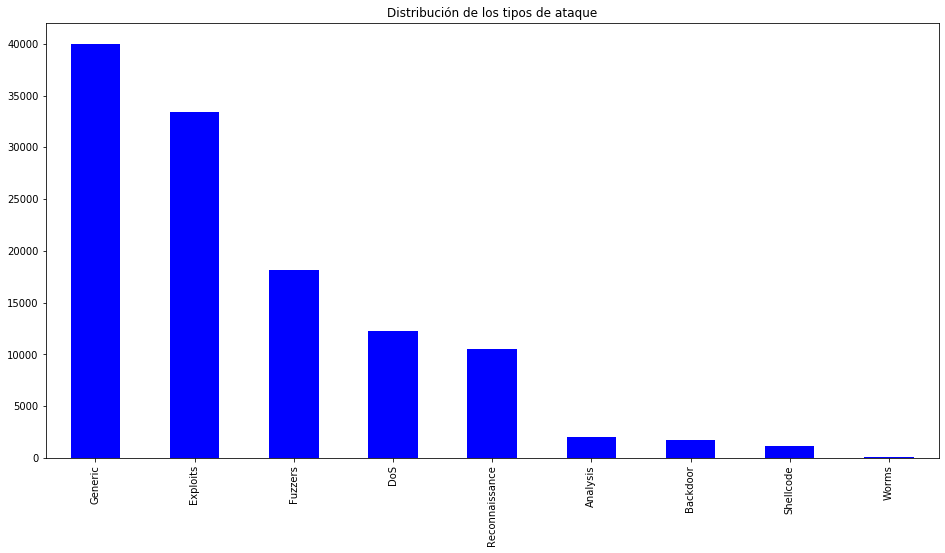

In [11]:
plt.figure(figsize=(16,8))
label = ['Generic','Exploits','Fuzzers','DoS','Reconnaissance','Analysis', 'Backdoor','Shellcode','Worms']

tipos.plot(kind = 'bar', # color = ('blue','red','purple','black','lightblue','magenta','lightblue')) #
           color = 'blue')
plt.title("Distribución de los tipos de ataque")
plt.xticks(rotation=90)

In [12]:
print('Entrenamiento:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("La Variable '{col_name}' tiene {unique_cat} categorias".format(col_name=col_name, unique_cat=unique_cat))

print()
print('Distribucion de las categorias proto:')
print(df['proto'].value_counts().sort_values(ascending=False).head())

print('Distribucion de las categorias state:')
print(df['state'].value_counts().sort_values(ascending=False).head())

print('Distribucion de las categorias service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

# La importancia de saber las categorias, es para conocer cuantas variables adicionales se agregaran
# al momento de transformalas en numericas

Entrenamiento:
La Variable 'attack_cat' tiene 10 categorias

Distribucion de las categorias proto:
113    79946
119    63283
120    12084
6       2859
78      2595
Name: proto, dtype: int64
Distribucion de las categorias state:
3    82275
2    77825
0    13152
5     1991
6       83
Name: state, dtype: int64
Distribucion de las categorias service:
0    94168
2    47294
5    18724
9     5058
4     3995
Name: service, dtype: int64


In [13]:
Attack= df[df['label'] == 1]
NonAttack = df[df['label'] == 0]
classes = pd.value_counts(df['label'], sort = True)
output=df['label']

Text(0, 0.5, 'Frecuencia')

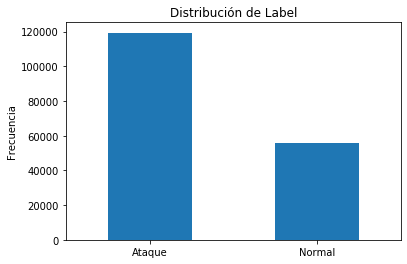

In [18]:
labels = ['Ataque','Normal']
classes.plot(kind = 'bar', rot=0)
plt.title("Distribución de Label")
plt.xticks(range(2), labels)
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuency')

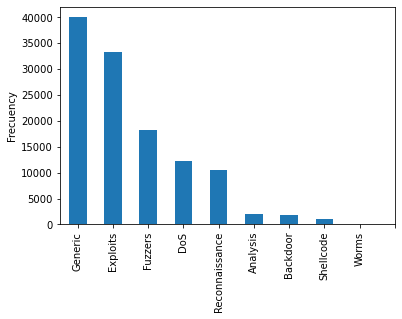

In [40]:
label = ['Generic','Exploits','Fuzzers','DoS','Reconnaissance','Analysis', 'Backdoor','Shellcode','Worms']
tipos.plot(kind = 'bar', rot=0)
plt.xticks(range(10), label)
plt.xticks(rotation=90)
plt.ylabel("Frecuency")

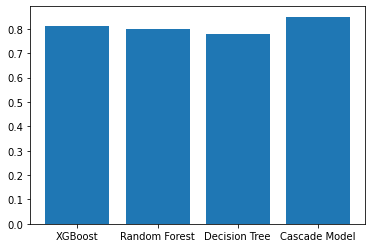

In [3]:
# Importing the matplotlib library
import matplotlib.pyplot as plt
# Categorical data: Country names
countries = ['XGBoost', 'Random Forest', 'Decision Tree', 'Cascade Model']
# Integer value interms of death counts
totalDeaths = [0.81, 0.80, 0.78, 0.85]
# Passing the parameters to the bar function, this is the main function which creates the bar plot
plt.bar(countries, totalDeaths)
# Displaying the bar plot
plt.show()